# creating indicators

simple moving averages

Starting Portfolio Value: 100000.00
2000-02-18, Close, 0.86
2000-02-18, BUY CREATE, 0.86
2000-02-22, BUY EXECUTED, Price: 0.85, Cost: 8.50, Comm 0.00
2000-02-22, Close, 0.88
2000-02-23, Close, 0.90
2000-02-24, Close, 0.89
2000-02-25, Close, 0.85
2000-02-25, SELL CREATE, 0.85
2000-02-28, SELL EXECUTED, Price: 0.85, Cost: 8.50, Comm 0.00
2000-02-28, OPERATION PROFIT, GROSS 0.00, NET 0.00
2000-02-28, Close, 0.87
2000-02-29, Close, 0.88
2000-02-29, BUY CREATE, 0.88
2000-03-01, BUY EXECUTED, Price: 0.91, Cost: 9.10, Comm 0.00
2000-03-01, Close, 1.01
2000-03-02, Close, 0.94
2000-03-03, Close, 0.99
2000-03-06, Close, 0.97
2000-03-07, Close, 0.95
2000-03-08, Close, 0.94
2000-03-09, Close, 0.94
2000-03-10, Close, 0.97
2000-03-13, Close, 0.94
2000-03-14, Close, 0.88
2000-03-14, SELL CREATE, 0.88
2000-03-15, SELL EXECUTED, Price: 0.89, Cost: 9.10, Comm 0.00
2000-03-15, OPERATION PROFIT, GROSS -0.20, NET -0.20
2000-03-15, Close, 0.90
2000-03-16, Close, 0.94
2000-03-16, BUY CREATE, 0.94
2000-03-17,

<IPython.core.display.Javascript object>


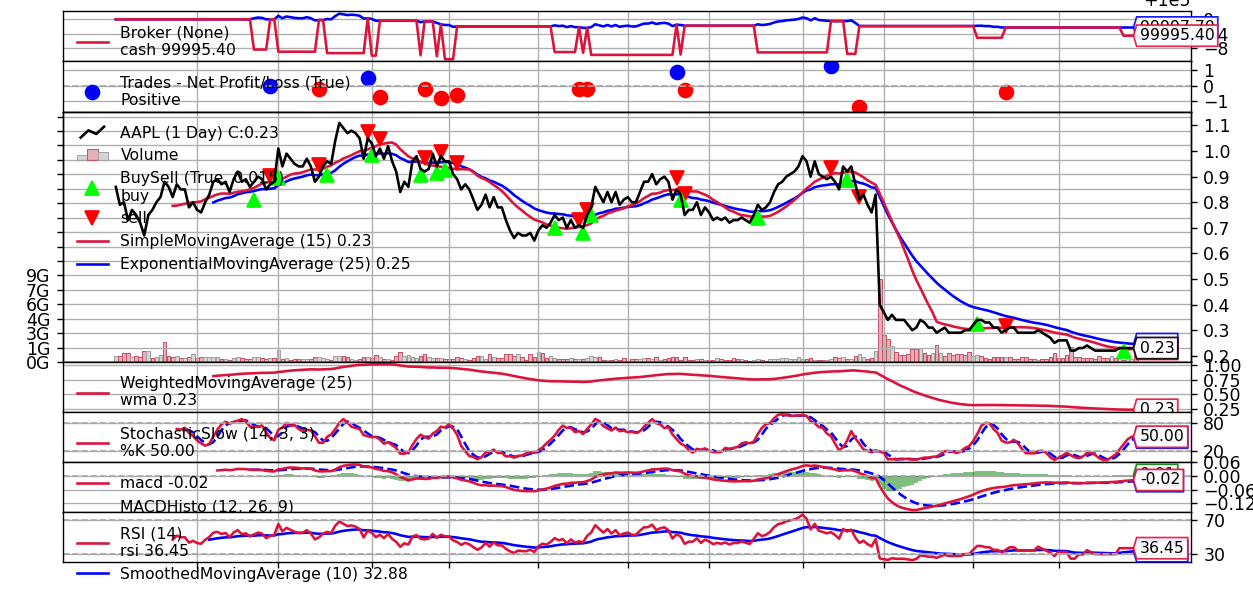

In [8]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Create a Data Feed
    data = bt.feeds.YahooFinanceData(
        dataname="AAPL",
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    cerebro.plot()


bollinger bands

golden cross over

intial value: 100000.00
2000-10-17, Close, 0.31
2000-10-18, Close, 0.31
2000-10-19, Close, 0.29
2000-10-20, Close, 0.3
2000-10-23, Close, 0.31
2000-10-24, Close, 0.29
2000-10-25, Close, 0.29
2000-10-26, Close, 0.29
2000-10-27, Close, 0.29
2000-10-30, Close, 0.3
2000-10-31, Close, 0.3
2000-11-01, Close, 0.32
2000-11-02, Close, 0.34
2000-11-03, Close, 0.34
2000-11-06, Close, 0.33
2000-11-07, Close, 0.33
2000-11-08, Close, 0.31
2000-11-09, Close, 0.31
2000-11-10, Close, 0.29
2000-11-13, Close, 0.3
2000-11-14, Close, 0.31
2000-11-15, Close, 0.31
2000-11-16, Close, 0.29
2000-11-17, Close, 0.29
2000-11-20, Close, 0.29
2000-11-21, Close, 0.29
2000-11-22, Close, 0.29
2000-11-24, Close, 0.3
2000-11-27, Close, 0.29
2000-11-28, Close, 0.28
2000-11-29, Close, 0.27
2000-11-30, Close, 0.25
2000-12-01, Close, 0.26
2000-12-04, Close, 0.26
2000-12-05, Close, 0.26
2000-12-06, Close, 0.22
2000-12-07, Close, 0.22
2000-12-08, Close, 0.23
2000-12-11, Close, 0.23
2000-12-12, Close, 0.24
2000-12-13, Close, 0.

<IPython.core.display.Javascript object>


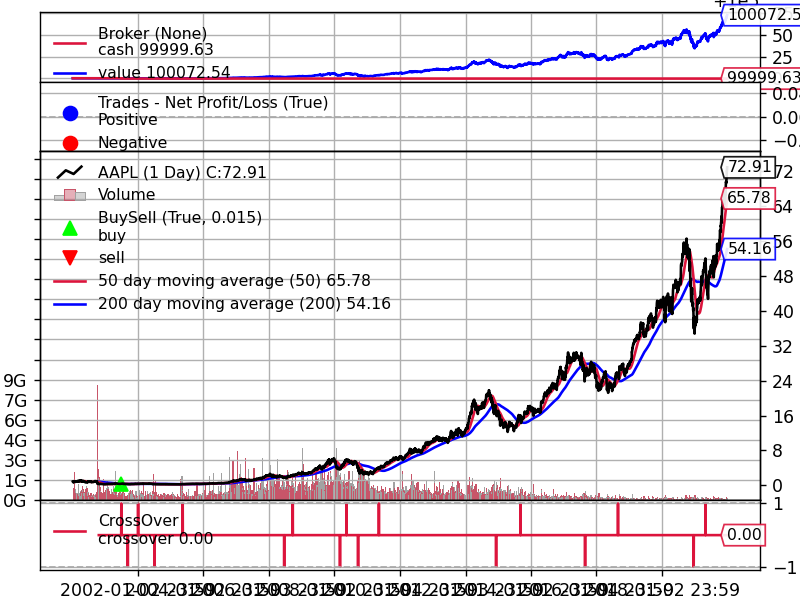

[[<Figure size 640x480 with 5 Axes>]]

In [3]:
from __future__ import (unicode_literals, print_function, division, absolute_import)

import backtrader as bt
import datetime

cerebro = bt.Cerebro()

class goldenCross(bt.Strategy):
    params = (('fast', 50), ('slow',200))
    
    def log(self,txt, dt = None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(),txt))
        
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        self.fast_ma = bt.indicators.SimpleMovingAverage(
        self.dataclose, period = self.params.fast, plotname = "50 day moving average")
        
        self.slow_ma = bt.indicators.SimpleMovingAverage(
        self.dataclose, period = self.params.slow, plotname = "200 day moving average")
        
        self.crossover = bt.indicators.CrossOver(self.fast_ma, self.slow_ma)
        
     
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))
        
    def next(self):
        self.log('Close, %s' % self.dataclose[0])
        
        if self.order : 
            return
        
        if not self.position:
            self.log('BUY CREATE, %.2f' % self.dataclose[0])
            if self.crossover > 0:
                self.order = self.buy()
                
        else:
            self.log('SELL CREATE, %.2f' % self.dataclose[0])
            if self.position <= 0:
                self.order = self.sell()
        
          
    
datas= bt.feeds.YahooFinanceData(
    dataname = "AAPL",
    fromdate = datetime.datetime(2000,1,1),
    todate = datetime.datetime(2020,1,1),
    reverse = False)

cerebro.adddata(datas)
cerebro.addstrategy(goldenCross)
cerebro.broker.setcommission(commission = 0.001)
cerebro.broker.setcash(100000)
print('intial value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('final value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

Starting Portfolio Value: 100000.00
2000-10-17, Close, 0.31
2000-10-18, Close, 0.31
2000-10-19, Close, 0.29
2000-10-20, Close, 0.30
2000-10-23, Close, 0.31
2000-10-24, Close, 0.29
2000-10-25, Close, 0.29
2000-10-26, Close, 0.29
2000-10-27, Close, 0.29
2000-10-30, Close, 0.30
2000-10-31, Close, 0.30
2000-11-01, Close, 0.32
2000-11-02, Close, 0.34
2000-11-03, Close, 0.34
2000-11-06, Close, 0.33
2000-11-07, Close, 0.33
2000-11-08, Close, 0.31
2000-11-09, Close, 0.31
2000-11-10, Close, 0.29
2000-11-13, Close, 0.30
2000-11-14, Close, 0.31
2000-11-15, Close, 0.31
2000-11-16, Close, 0.29
2000-11-17, Close, 0.29
2000-11-20, Close, 0.29
2000-11-21, Close, 0.29
2000-11-22, Close, 0.29
2000-11-24, Close, 0.30
2000-11-27, Close, 0.29
2000-11-28, Close, 0.28
2000-11-29, Close, 0.27
2000-11-30, Close, 0.25
2000-12-01, Close, 0.26
2000-12-04, Close, 0.26
2000-12-05, Close, 0.26
2000-12-06, Close, 0.22
2000-12-07, Close, 0.22
2000-12-08, Close, 0.23
2000-12-11, Close, 0.23
2000-12-12, Close, 0.24
2000

<IPython.core.display.Javascript object>


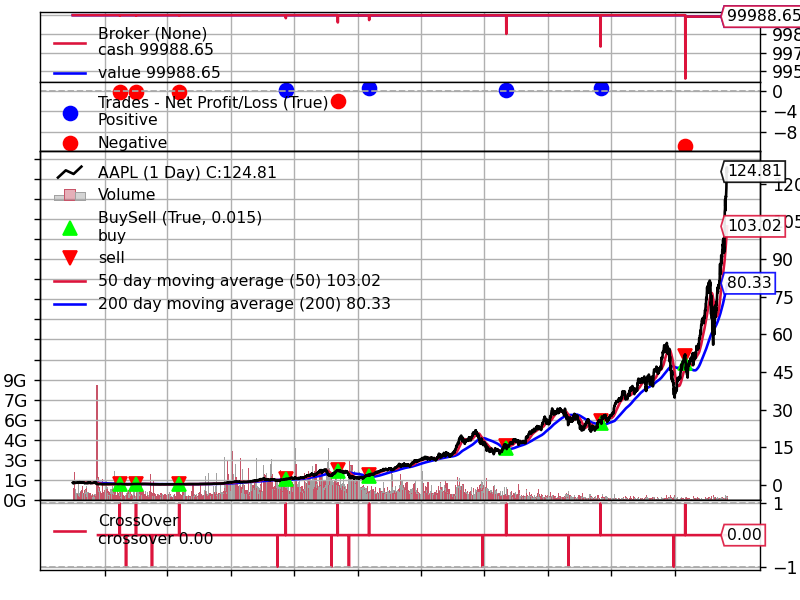

In [5]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class goldenCross(bt.Strategy):
    params = (('fast', 50), ('slow',200))

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        self.fast_ma = bt.indicators.SimpleMovingAverage(
        self.dataclose, period = self.params.fast, plotname = "50 day moving average")
        
        self.slow_ma = bt.indicators.SimpleMovingAverage(
        self.dataclose, period = self.params.slow, plotname = "200 day moving average")
        
        self.crossover = bt.indicators.CrossOver(self.fast_ma, self.slow_ma)

        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.crossover > 0:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.crossover <= 0:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(goldenCross)

    # Create a Data Feed
    data = bt.feeds.YahooFinanceData(
        dataname="AAPL",
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2020, 8, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    cerebro.plot()


RSI

Starting Portfolio Value: 100000.00
2018-01-23 Close, 42.67
2018-01-24 Close, 41.99
2018-01-25 Close, 41.24
2018-01-26 Close, 41.33
2018-01-29 Close, 40.48
2018-01-30 Close, 40.24
2018-01-31 Close, 40.35
2018-02-01 Close, 40.43
2018-02-02 Close, 38.68
2018-02-05 Close, 37.71
2018-02-06 Close, 39.29
2018-02-07 Close, 38.45
2018-02-07 BUY CREATE, 38.45
2018-02-08 BUY EXECUTED, Price: 38.63, Cost: 386.30, Comm 0.00
2018-02-08 Close, 37.39
2018-02-09 Close, 37.85
2018-02-12 Close, 39.37
2018-02-13 Close, 39.77
2018-02-14 Close, 40.50
2018-02-15 Close, 41.86
2018-02-16 Close, 41.72
2018-02-20 Close, 41.58
2018-02-21 Close, 41.39
2018-02-22 Close, 41.74
2018-02-23 Close, 42.47
2018-02-26 Close, 43.31
2018-02-27 Close, 43.17
2018-02-28 Close, 43.10
2018-03-01 Close, 42.35
2018-03-02 Close, 42.64
2018-03-05 Close, 42.79
2018-03-06 Close, 42.75
2018-03-07 Close, 42.35
2018-03-08 Close, 42.82
2018-03-09 Close, 43.55
2018-03-12 Close, 43.97
2018-03-13 Close, 43.55
2018-03-14 Close, 43.18
2018-03-

<IPython.core.display.Javascript object>


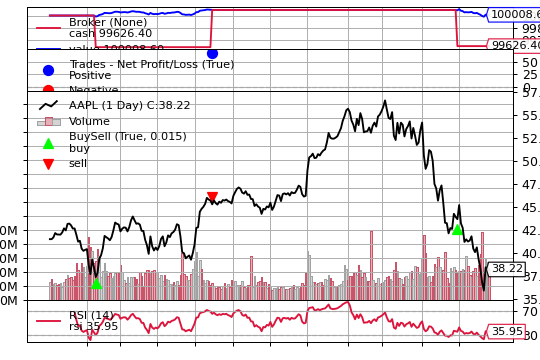

In [5]:
%matplotlib inline

from __future__ import (absolute_import, division, print_function, unicode_literals)
import matplotlib.pyplot as plt
import backtrader as bt
import datetime


#Creating strategy
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt = None):
        '''Printing function for the complete strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s %s' % (dt.isoformat(), txt))
    
    def __init__(self):
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        #Adding SMA indicator
        self.sma = bt.indicators.RSI(self.datas[0])
        # self.sma = bt.indicators.SmoothedMovingAverage(rsi, period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            else:
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm: %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
                self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return 

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' % (trade.pnl, trade.pnlcomm))

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])

        if self.order:
            return

        #check if we are in market
        if not self.position:
            if self.sma[-2] <= 30:
                if self.sma[-2] <= self.sma[-1]:
                    if self.sma[0] > 30:
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])
                        self.order = self.buy()
        else:
            if self.sma[-2] >= 70:
                if self.sma[-2] >= self.sma[-1]:
                    if self.sma[0] < 70:
                        self.log('SELL CREATE, %.2f' % self.dataclose[0])
                        self.order = self.sell()

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(TestStrategy)
    cerebro.broker.setcash(100000.0)
    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)
    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    #Adding data feed
    data = bt.feeds.YahooFinanceData(
        dataname = 'AAPL', 
        fromdate = datetime.datetime(2018, 1, 1),
        todate = datetime.datetime(2018, 12, 31),
        reverse = False
    )
    cerebro.adddata(data)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.plot()

RSI with smoothed moving average

Starting Portfolio Value: 100000.00
2015-02-05 Close, 27.47
2015-02-05 BUY CREATE, 27.47
2015-02-06 BUY EXECUTED, Price: 27.49, Cost: 274.90, Comm 0.00
2015-02-06 Close, 27.24
2015-02-09 Close, 27.42
2015-02-10 Close, 27.95
2015-02-11 Close, 28.60
2015-02-12 Close, 28.96
2015-02-13 Close, 29.11
2015-02-17 Close, 29.28
2015-02-18 Close, 29.48
2015-02-19 Close, 29.42
2015-02-20 Close, 29.66
2015-02-23 Close, 30.46
2015-02-24 Close, 30.27
2015-02-25 Close, 29.50
2015-02-25 SELL CREATE, 29.50
2015-02-26 SELL EXECUTED, Price: 29.50, Cost: 274.90, Comm: 0.00
2015-02-26 OPERATION PROFIT, GROSS 20.10, NET 20.10
2015-02-26 Close, 29.87
2015-02-27 Close, 29.42
2015-03-02 Close, 29.57
2015-03-03 Close, 29.63
2015-03-04 Close, 29.44
2015-03-05 Close, 28.95
2015-03-06 Close, 29.00
2015-03-09 Close, 29.12
2015-03-10 Close, 28.52
2015-03-11 Close, 28.00
2015-03-12 Close, 28.50
2015-03-13 Close, 28.31
2015-03-16 Close, 28.62
2015-03-17 Close, 29.10
2015-03-18 Close, 29.42
2015-03-18 BUY CREATE, 29.42


<IPython.core.display.Javascript object>


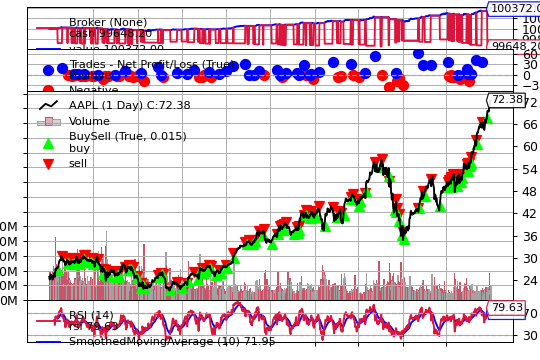

In [4]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import matplotlib.pyplot as plt
import backtrader as bt
import datetime


#Creating strategy
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt = None):
        '''Printing function for the complete strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s %s' % (dt.isoformat(), txt))
    
    def __init__(self):
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        #Adding SMA indicator
        self.rsi = rsi = bt.indicators.RSI(self.datas[0])
        self.sma_rsi = bt.indicators.SmoothedMovingAverage(rsi, period=10)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm)
                )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            else:
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm: %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
                self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return 

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' % (trade.pnl, trade.pnlcomm))

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])

        if self.order:
            return

        #check if we are in market
        if not self.position:
            if self.rsi[0] > self.sma_rsi[0] and self.rsi[0] > 30:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy()
        else:
            if self.rsi[0] < self.sma_rsi[0] and self.rsi[0] < 70:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(TestStrategy)
    cerebro.broker.setcash(100000.0)
    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)
    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    #Adding data feed
    data = bt.feeds.YahooFinanceData(
        dataname = 'AAPL', 
        fromdate = datetime.datetime(2015, 1, 1),
        todate = datetime.datetime(2019, 12, 31),
        reverse = False
    )
    cerebro.adddata(data)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.plot()

MACD

In [ ]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import matplotlib.pyplot as plt
import backtrader as bt
import datetime


#Creating strategy
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt = None):
        '''Printing function for the complete strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s %s' % (dt.isoformat(), txt))
    
    def __init__(self):
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        self.macd = bt.indicators.MACDHisto(self.data[0])
        self.macd_signal = bt.indicators.ExponentialMovingAverage(self.macd, period = self.params.maperiod)
       
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm)
                )

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            else:
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm: %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
                self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return 

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' % (trade.pnl, trade.pnlcomm))

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])

        if self.order:
            return

        #check if we are in market
        if not self.position:
            if self.macd[0] > self.macd_signal[0]:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy()
        else:
            if self.macd[0] < self.macd_signal[0]:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()
                
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)
cerebro.broker.setcash(100000.0)
# Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)
# Set the commission
cerebro.broker.setcommission(commission=0.0)

#Adding data feed
data = bt.feeds.YahooFinanceData(
    dataname = 'AAPL', 
    fromdate = datetime.datetime(2015, 1, 1),
    todate = datetime.datetime(2019, 12, 31),
    reverse = False)
cerebro.adddata(data)
    
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

Starting Portfolio Value: 100000.00
